In [16]:
# Modules to import
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
from importlib import reload

In [17]:
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
paths = ['src/data','src/models','src/scripts','src/utils']
for path in paths:
    sys.path.append(path)

### IV.3 Theme Study for Cultural Influence Analysis

### nouvelle méthode pour le score d'influence

In [9]:
import scriptculture
reload(scriptculture)

<module 'scriptculture' from 'c:\\Users\\Oscar\\Project ADA\\ada-2024-project-teamcsx24\\src/scripts\\scriptculture.py'>

In [11]:
from scriptculture import process_data_us_influence          # Import the function that processes the data for this study

df_us_influence_final = process_data_us_influence()
df_us_influence_final.head()

,Country,US_Term_Count,Number of movies,Influence_score,log_number_of_movies,World_region,nlp_score
0,France,531,2297,0.231171,7.739359,Europe,0.131262
1,Soviet Union,30,255,0.117647,5.541264,Eastern Europe and Central Asia,0.079629
2,Russia,18,217,0.082949,5.379897,Eastern Europe and Central Asia,0.099043
3,India,262,4752,0.055135,8.466321,South Asia,0.079816
4,Australia,160,748,0.213904,6.617403,Oceania,0.157515


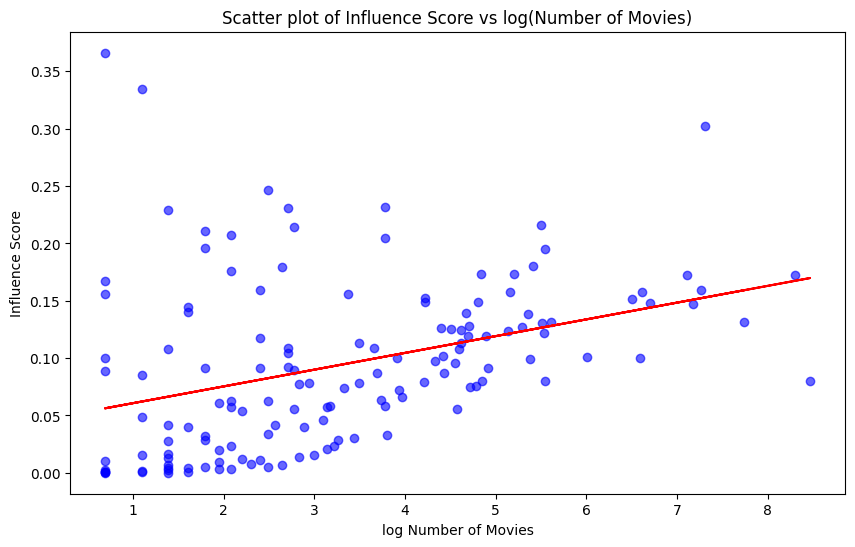

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df_us_influence_final['log_number_of_movies'], 
    df_us_influence_final['nlp_score'], 
    color='blue', 
    alpha=0.6
)
#add the linear regression line
z = np.polyfit(df_us_influence_final['log_number_of_movies'], df_us_influence_final['nlp_score'], 1)
p = np.poly1d(z)
plt.plot(df_us_influence_final['log_number_of_movies'],p(df_us_influence_final['log_number_of_movies']),"r-")
plt.title('Scatter plot of Influence Score vs log(Number of Movies)')
plt.xlabel('log Number of Movies')
plt.ylabel('Influence Score')

plt.show()

C:\Users\Oscar\AppData\Local\Temp\ipykernel_28404\2809295553.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='World_region', y='nlp_score', data=df_us_influence_final, order=median_order, palette=sns.color_palette("husl"))
C:\Users\Oscar\AppData\Local\Temp\ipykernel_28404\2809295553.py:6: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='World_region', y='nlp_score', data=df_us_influence_final, order=median_order, palette=sns.color_palette("husl"))


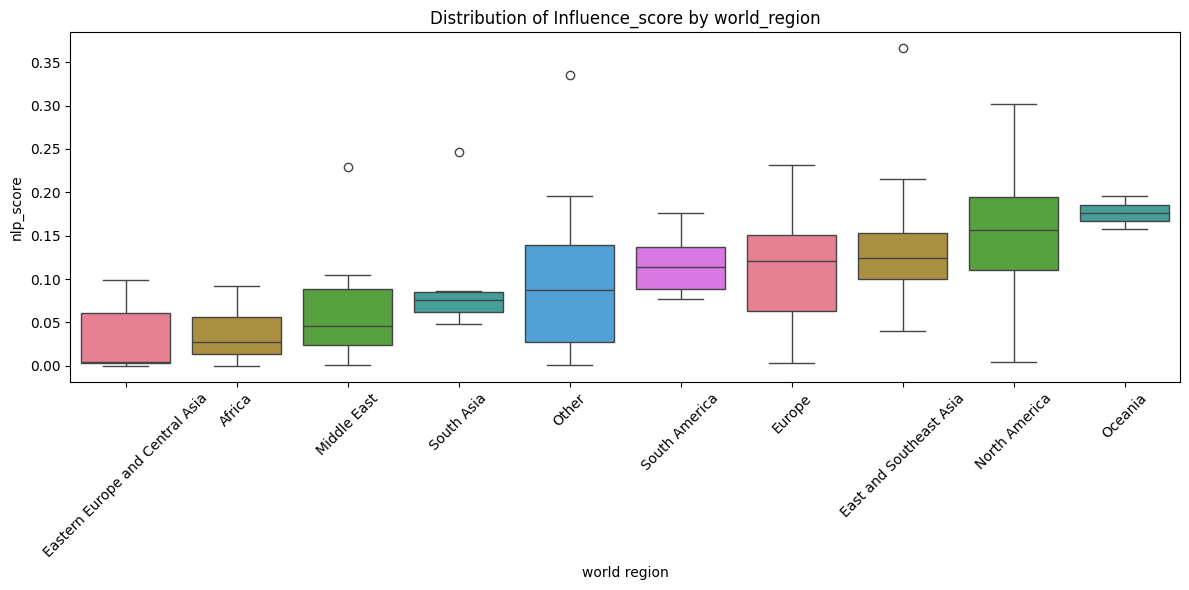

In [13]:
plt.figure(figsize=(12, 6))
# Sort by median ratio
median_order = df_us_influence_final.groupby('World_region')['nlp_score'].median().sort_values().index

# Create the boxplot with the sorted order
sns.boxplot(x='World_region', y='nlp_score', data=df_us_influence_final, order=median_order, palette=sns.color_palette("husl"))
plt.title('Distribution of Influence_score by world_region')
plt.xlabel('world region')
plt.ylabel('nlp_score')


plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

### Il faut standardiser les 2 features pour que la clusterisation ait du sens : excellent c'est très en lien avec le cours

In [14]:
from sklearn.preprocessing import StandardScaler

df_selected = df_us_influence_final[['log_number_of_movies', 'nlp_score']]
# Normalisation des données
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_selected)
df_scaled = pd.DataFrame(df_scaled, columns=df_selected.columns)
df_scaled.head()

,log_number_of_movies,nlp_score
0,2.423053,0.508341
1,1.225773,-0.199466
2,1.137879,0.066659
3,2.819022,-0.196905
4,1.811935,0.868228


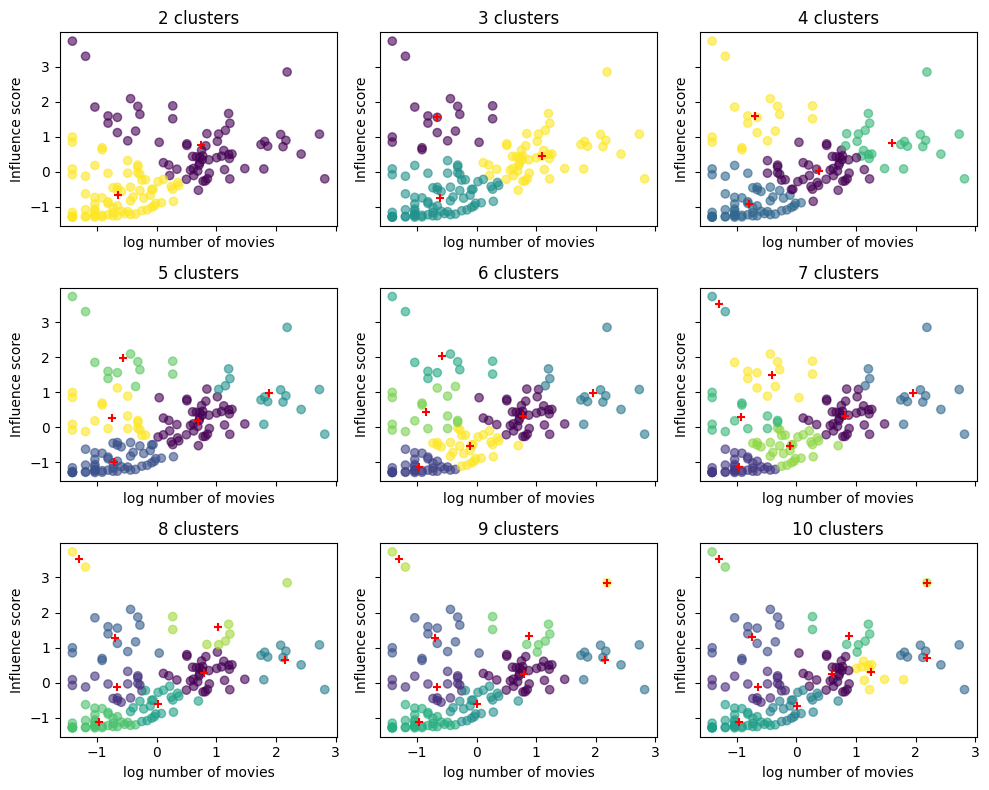

In [18]:
X = df_scaled[['log_number_of_movies', 'nlp_score']].values

MIN_CLUSTERS = 2
MAX_CLUSTERS = 10

# Compute number of row and columns
COLUMNS = 3
ROWS = math.ceil((MAX_CLUSTERS-MIN_CLUSTERS)/COLUMNS)
fig, axs = plt.subplots(ROWS, COLUMNS, figsize=(10,8), sharey=True, sharex=True)

# Plot the clusters
for n_clusters in range(MIN_CLUSTERS, MAX_CLUSTERS+1):
    current_column = (n_clusters-MIN_CLUSTERS)%COLUMNS
    current_row = (n_clusters-MIN_CLUSTERS)//COLUMNS
    # Get the axis where to add the plot
    ax = axs[current_row, current_column]
    # Cluster the data with the current number of clusters
    kmean = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    # Plot the data by using the labels as color
    ax.scatter(X[:,0], X[:,1], c=kmean.labels_, alpha=0.6)
    ax.set_title("%s clusters"%n_clusters)
    ax.set_xlabel("log number of movies")
    ax.set_ylabel("Influence score")
    # Plot the centroids
    for c in kmean.cluster_centers_:
        ax.scatter(c[0], c[1], marker="+", color="red")

plt.tight_layout()

Text(0, 0.5, 'Silhouette score')

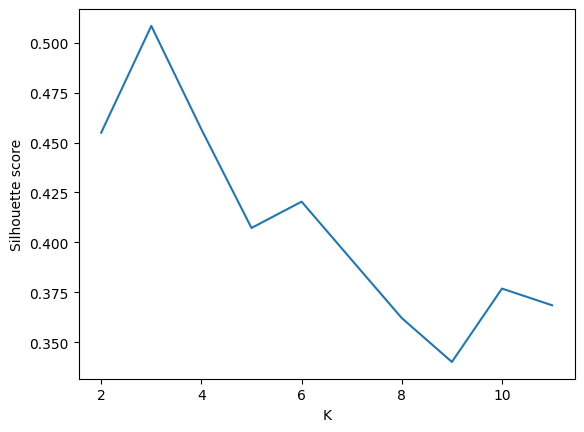

In [23]:
silhouettes = []

# Try multiple k
for k in range(2, 12):
    # Cluster the data and assigne the labels
    labels = KMeans(n_clusters=k, random_state=10).fit_predict(X)
    # Get the Silhouette score
    score = silhouette_score(X, labels)
    silhouettes.append({"k": k, "score": score})
    
# Convert to dataframe
silhouettes = pd.DataFrame(silhouettes)

# Plot the data
plt.plot(silhouettes.k, silhouettes.score)
plt.xlabel("K")
plt.ylabel("Silhouette score")

In [29]:
kmeans_final = KMeans(n_clusters=3, random_state=42).fit(X)
df_us_influence_final['cluster'] = kmeans_final.labels_
df_us_influence_final[df_us_influence_final['cluster']==2].head(30)

,Country,US_Term_Count,Number of movies,Influence_score,log_number_of_movies,World_region,nlp_score,cluster
0,France,531,2297,0.231171,7.739359,Europe,0.131262,2
1,Soviet Union,30,255,0.117647,5.541264,Eastern Europe and Central Asia,0.079629,2
2,Russia,18,217,0.082949,5.379897,Eastern Europe and Central Asia,0.099043,2
3,India,262,4752,0.055135,8.466321,South Asia,0.079816,2
4,Australia,160,748,0.213904,6.617403,Oceania,0.157515,2
5,New Zealand,34,256,0.132812,5.545177,Oceania,0.195417,2
6,Canada,409,1492,0.274129,7.307873,North America,0.302068,2
7,Germany,551,1315,0.419011,7.181592,Europe,0.146752,2
8,Czech Republic,23,101,0.227723,4.615121,Europe,0.113248,2
9,United Kingdom,1093,4037,0.270746,8.303257,Europe,0.172803,2


C:\Users\Oscar\AppData\Local\Temp\ipykernel_28404\1252171230.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='Influence_score', data=df_us_influence_final, order=median_order, palette=sns.color_palette("husl"))
C:\Users\Oscar\AppData\Local\Temp\ipykernel_28404\1252171230.py:6: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(x='cluster', y='Influence_score', data=df_us_influence_final, order=median_order, palette=sns.color_palette("husl"))


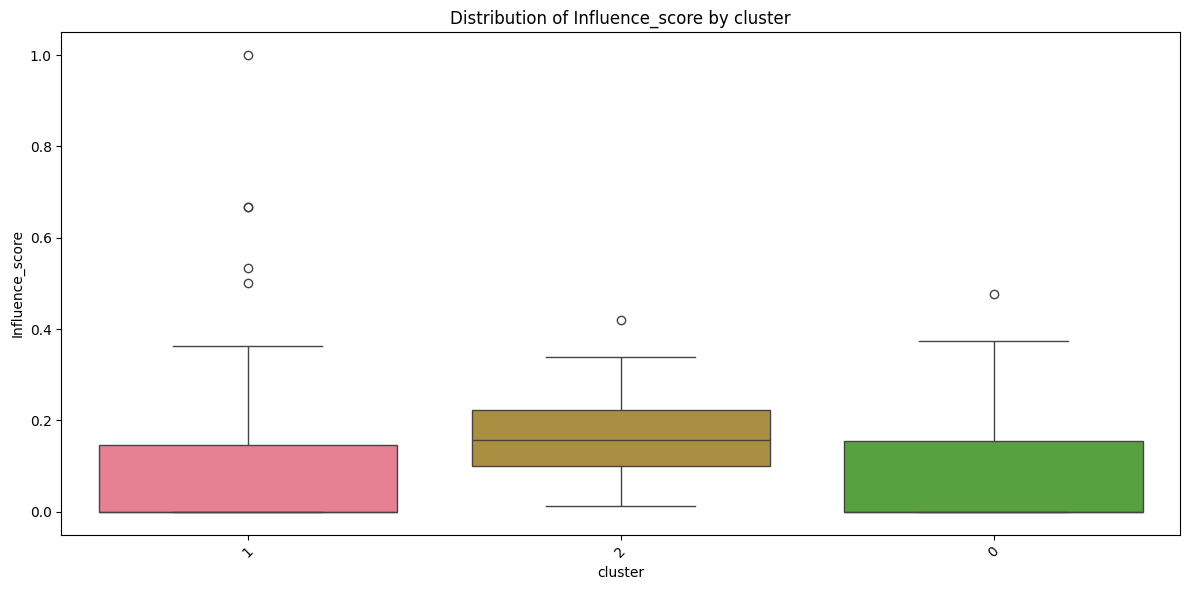

In [22]:
plt.figure(figsize=(12, 6))
# Sort by median ratio
median_order = df_us_influence_final.groupby('cluster')['nlp_score'].median().sort_values().index

# Create the boxplot with the sorted order
sns.boxplot(x='cluster', y='Influence_score', data=df_us_influence_final, order=median_order, palette=sns.color_palette("husl"))
plt.title('Distribution of Influence_score by cluster')
plt.xlabel('cluster')
plt.ylabel('Influence_score')


plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

Relation région du monde et cluster

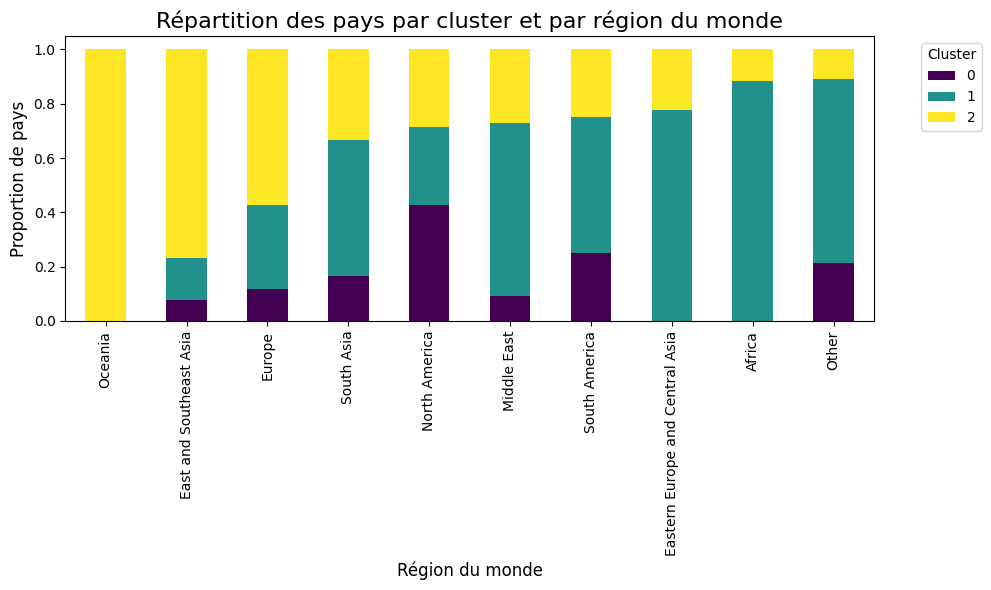

In [32]:
region_cluster_counts = df_us_influence_final.groupby(['World_region', 'cluster'])['Country'].count().unstack(fill_value=0)

# Normaliser les données pour obtenir des proportions
region_cluster_proportions = region_cluster_counts.div(region_cluster_counts.sum(axis=1), axis=0)
region_cluster_proportions = region_cluster_proportions.sort_values(by=2, ascending=False)
# Plot
region_cluster_proportions.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='viridis'
)

# Customisation
plt.title("Répartition des pays par cluster et par région du monde", fontsize=16)
plt.ylabel("Proportion de pays", fontsize=12)
plt.xlabel("Région du monde", fontsize=12)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()